In [1]:
import pandas as pd
import glob as glob
import numpy as np
import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
%matplotlib inline

In [3]:
multas = pd.read_csv('data/MultasMAD_Python.csv', sep=',', encoding="ISO-8859-1")

In [4]:
multas.columns

Index(['HECHO.BOL', 'CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL',
       'DESCUENTO', 'PUNTOS', 'DENUNCIANTE', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y', 'VEHICULO', 'CATEGORIA', 'lon', 'lat'],
      dtype='object')

In [5]:
#Eliminacion de columnas COORDENADA_X Y COORDENADA_Y, axis 1 indica que son columnas
multas = multas.drop(['COORDENADA_X', 'COORDENADA_Y'], axis=1)

In [6]:
multas.head()

,HECHO.BOL,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,VEL_LIMITE,VEL_CIRCULA,VEHICULO,CATEGORIA,lon,lat
0,"ESTACIONAR EN CARRIL RESERVADO PARA USO, PARAD...",GRAVE,ORENSE 13,12,2015,12.47,200,SI,0,POLICIA MUNICIPAL,NaN,NaN,ESTACIONAMIENTO NEGLIGENTE,AUTOMOTOR,NaN,NaN
1,NO RESPETAR LAS SEÑALES EN UNA VÍA DE CIRCULAC...,LEVE,PZ LAVAPIES 6,OCTUBRE,2014,14.03,90,SI,0,AGENTES DE MOVILIDAD,NaN,NaN,OMISION DE SENALIZACION VIAL O DE CONDUCCION,AUTOMOTOR,NaN,NaN
2,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",LEVE,CL SECO 7,4,2017,14.27,90,SI,0,SER,NaN,NaN,ESTACIONAMIENTO NEGLIGENTE,AUTOMOTOR,NaN,NaN
3,SOBREPASAR LA VELOCIDADMÁXIMA EN VÍAS LIMITADA...,GRAVE,"KM 4,6 AV AMERICA",6,2016,4.49,100,SI,0,POLICIA MUNICIPAL,70.0,92.0,VELOCIDAD O ACELERACION INDEBIDA,AUTOMOTOR,NaN,NaN
4,"ESTACIONAR, SIN EL DISTINTIVO QUE LO AUTORIZA,...",LEVE,EMBAJADORES 212,8,2016,9.29,90,SI,0,SER,NaN,NaN,ESTACIONAMIENTO NEGLIGENTE,AUTOMOTOR,NaN,NaN


In [7]:
#Formato a HORA
multas.HORA = multas.HORA.astype(str)

def formato_hora(hora):
    hora = hora.replace('.',':')
    
    return str(hora)

Hora = ['HORA']
for col in Hora:
    multas[col] = multas.apply(lambda fila: formato_hora(fila[col]), axis=1)


In [8]:
#Cambio el tipo de dato 
multas['ANIO'] = multas['ANIO'].values.astype(np.int64)
multas['MES'] = multas['MES'].values.astype(np.str)
multas['VEL_LIMITE'] = multas['VEL_LIMITE'].values.astype(np.str)
multas['VEL_CIRCULA'] = multas['VEL_CIRCULA'].values.astype(np.str)

In [9]:
#cambio en a fecha
multas['MES'] = multas['MES'].str.replace('ENERO','JAN')
multas['MES'] = multas['MES'].str.replace('FEBRERO','FEB')
multas['MES'] = multas['MES'].str.replace('MARZO','MAR')
multas['MES'] = multas['MES'].str.replace('ABRIL','APR')
multas['MES'] = multas['MES'].str.replace('MAYO','MAY')
multas['MES'] = multas['MES'].str.replace('JUNIO','JUN')
multas['MES'] = multas['MES'].str.replace('JULIO','JUL')
multas['MES'] = multas['MES'].str.replace('AGOSTO','AUG')
multas['MES'] = multas['MES'].str.replace('SEPTIEMBRE','SEP')
multas['MES'] = multas['MES'].str.replace('OCTUBRE','OCT')
multas['MES'] = multas['MES'].str.replace('NOVIEMBRE','NOV')
multas['MES'] = multas['MES'].str.replace('DICIEMBRE','DEC')

multas['MES'] = multas['MES'].str.replace('1','JAN')
multas['MES'] = multas['MES'].str.replace('2','FEB')
multas['MES'] = multas['MES'].str.replace('3','MAR')
multas['MES'] = multas['MES'].str.replace('4','APR')
multas['MES'] = multas['MES'].str.replace('5','MAY')
multas['MES'] = multas['MES'].str.replace('6','JUN')
multas['MES'] = multas['MES'].str.replace('7','JUL')
multas['MES'] = multas['MES'].str.replace('8','AUG')
multas['MES'] = multas['MES'].str.replace('9','SEP')
multas['MES'] = multas['MES'].str.replace('10','OCT')
multas['MES'] = multas['MES'].str.replace('11','NOV')
multas['MES'] = multas['MES'].str.replace('12','DEC')

In [10]:
#limpieza de calificaciones
multas['CALIFICACION'] = multas['CALIFICACION'].str.replace('LEVE      ','LEVE')
multas['CALIFICACION'] = multas['CALIFICACION'].str.replace('GRAVE     ','GRAVE')
multas['CALIFICACION'] = multas['CALIFICACION'].str.replace('MUY GRAVE ','MUY GRAVE')

In [11]:
# Limpieza de NaN
multas['VEL_LIMITE'] = multas['VEL_LIMITE'].str.replace('NaN','')
multas['VEL_CIRCULA'] = multas['VEL_CIRCULA'].str.replace('NaN','')

In [12]:
# Agregr nombre a los denuciantes
multas['DENUNCIANTE'] = multas['DENUNCIANTE'].str.replace('SER                 ','SER')
multas['DENUNCIANTE'] = multas['DENUNCIANTE'].str.replace('POLICIA MUNICIPAL   ','POLICIA MUNICIPAL')
multas['DENUNCIANTE'] = multas['DENUNCIANTE'].str.replace('SACE                ','SACE')

In [13]:
multas['MES'] = multas['MES'].str.replace('JAN0','JAN')
multas['MES'] = multas['MES'].str.replace('JANJAN','JAN')
multas['MES'] = multas['MES'].str.replace('MAR.0','MAR')
multas['MES'] = multas['MES'].str.replace('JANFEB','JAN')

In [14]:
# Combinacion de columnas MES/ANIO HORA
multas['FECHA'] = multas.apply(lambda fila: str(fila.MES) + '' + str(fila.ANIO)+ ' ' + str(fila.HORA), axis=1)

In [15]:
#Cambio el formato de fecha
multas['FECHA'] = multas['FECHA'].apply(lambda x: 
                                dt.datetime.strptime(x,'%b%Y %H:%M'))

In [ ]:
multas.head()

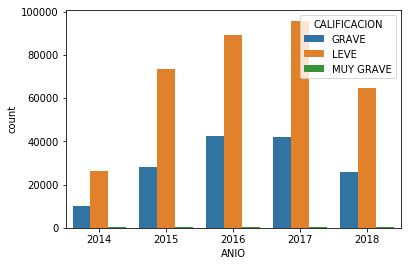

In [16]:
out = sns.countplot(x='ANIO', hue='CALIFICACION', data=multas)

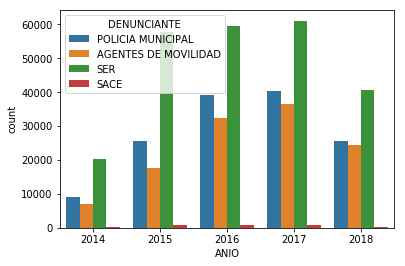

In [17]:
out = sns.countplot(x='ANIO', hue='DENUNCIANTE', data=multas)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


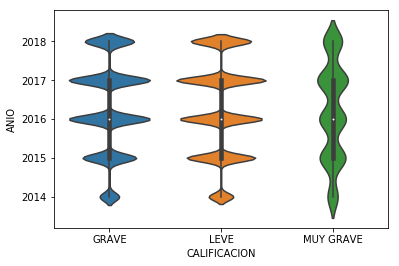

In [18]:
out = sns.violinplot(x='CALIFICACION', y='ANIO', data=multas)

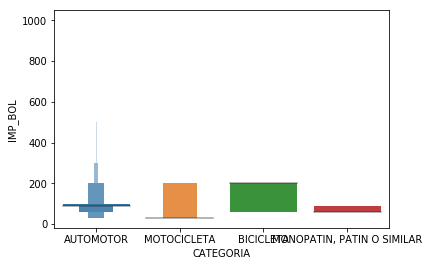

In [27]:
ax = sns.boxenplot(x="CATEGORIA", y="IMP_BOL", data=multas)

In [ ]:
# Creamos y añadimos marcadores en el mapa
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
df = multas[(multas['lat'] > 0) & (multas['lon'] != 0)]
for i in range(0,len(df)):
    folium.Marker([df.iloc[i]['lat'], df.iloc[i]['lon']]).add_to(m)

m.save('multas_folium.html')